In [86]:
import pandas as pd
from  datetime import datetime, timedelta
import matplotlib.pyplot as plt
import gc
import numpy as np

In [87]:
calendar = pd.read_csv(r"C:\Users\Xiang Fu\Desktop\Kaggle\m5-forecasting-accuracy/calendar_2.csv")
calendar["date"] = pd.to_datetime(calendar["date"])
calendar.head(10)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,CA,TX,WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,4,4,4
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,4,4,4
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,2,2,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,2,0,2
5,2011-02-03,11101,Thursday,6,2,2011,d_6,NaN,NaN,2,2,2
6,2011-02-04,11101,Friday,7,2,2011,d_7,NaN,NaN,2,0,0
7,2011-02-05,11102,Saturday,1,2,2011,d_8,NaN,NaN,6,6,6
8,2011-02-06,11102,Sunday,2,2,2011,d_9,SuperBowl,Sporting,5,5,5
9,2011-02-07,11102,Monday,3,2,2011,d_10,NaN,NaN,2,2,0


In [88]:
# Read csv file
pricetypes = {'store_id': 'category',
             'item_id': 'category',
             'wm_yr_wk': 'int16',
             'sell_price': 'float32',
             'sell_diff': 'float32',
             'ratio': 'float32'}

prices_wi = pd.read_csv(r"C:\Users\Xiang Fu\Desktop\Kaggle\m5-forecasting-accuracy/sell_price_wi.csv", dtype = pricetypes)

In [89]:
prices_wi.head()

,store_id,item_id,wm_yr_wk,sell_price,sell_diff,ratio,train_id
0,WI_1,HOBBIES_1_001,11325,9.58,NaN,1.0,1437
1,WI_1,HOBBIES_1_001,11326,9.58,0.0,1.0,1437
2,WI_1,HOBBIES_1_001,11327,9.58,0.0,1.0,1437
3,WI_1,HOBBIES_1_001,11328,9.58,0.0,1.0,1437
4,WI_1,HOBBIES_1_001,11329,9.58,0.0,1.0,1437


In [90]:
prices_wi.tail()

,store_id,item_id,wm_yr_wk,sell_price,sell_diff,ratio,train_id
2040172,WI_3,FOODS_3_827,11617,1.0,0.0,1.0,1436
2040173,WI_3,FOODS_3_827,11618,1.0,0.0,1.0,1436
2040174,WI_3,FOODS_3_827,11619,1.0,0.0,1.0,1436
2040175,WI_3,FOODS_3_827,11620,1.0,0.0,1.0,1436
2040176,WI_3,FOODS_3_827,11621,1.0,0.0,1.0,1436


In [91]:
firstDay = 1183
lastDay = 1913

# Use x sales days (columns) for training
numCols = [f"d_{day}" for day in range(firstDay, lastDay+1)]

# Define all categorical columns
catCols = ['id', 'item_id', 'dept_id','store_id', 'cat_id', 'state_id']

# Define the correct data types for "sales_train_validation.csv"
dtype = {numCol: "float32" for numCol in numCols} 
dtype.update({catCol: "category" for catCol in catCols if catCol != "id"})

[(k,v)  for k,v in dtype.items()][:10]

[('d_1183', 'float32'),
 ('d_1184', 'float32'),
 ('d_1185', 'float32'),
 ('d_1186', 'float32'),
 ('d_1187', 'float32'),
 ('d_1188', 'float32'),
 ('d_1189', 'float32'),
 ('d_1190', 'float32'),
 ('d_1191', 'float32'),
 ('d_1192', 'float32')]

In [92]:
# Read csv file
ds = pd.read_csv(r"C:\Users\Xiang Fu\Desktop\Kaggle\m5-forecasting-accuracy/sales_train_validation.csv", 
                 usecols = catCols + numCols, dtype = dtype)

ds.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1183,d_1184,d_1185,d_1186,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,1.0,1.0,1.0,3.0,0.0,1.0,1.0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,0.0,0.0,...,2.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,1.0,1.0,4.0,1.0,...,1.0,0.0,5.0,4.0,1.0,0.0,1.0,3.0,7.0,2.0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,1.0,0.0,1.0,2.0,...,2.0,1.0,1.0,0.0,1.0,1.0,2.0,2.0,2.0,4.0


In [93]:
WI_validation = ds[(ds['state_id'] == 'WI')].copy()

In [94]:
WI_validation.shape

(9147, 737)

In [95]:
# Transform categorical features into integers
trLast = 1913

def create_ds(data,prices):
    for day in range(trLast + 1, trLast+ 56 +1):
        data[f"d_{day}"] = np.nan
        
    data = pd.melt(data,
                 id_vars = catCols,
                 value_vars = [col for col in data.columns if col.startswith("d_")],
                 var_name = "d",
                 value_name = "sales")

# # Merge data with "calendar" and "prices" dataframe
    data = data.merge(calendar, on = "d", copy = False)
    data = data.merge(prices, on = ["store_id", "item_id","wm_yr_wk",], copy = False)
    return data

In [96]:
WI_validation = create_ds(WI_validation,prices_wi)
WI_validation.tail()

,id,item_id,dept_id,store_id,cat_id,state_id,d,sales,date,wm_yr_wk,...,year,event_name_1,event_type_1,CA,TX,WI,sell_price,sell_diff,ratio,train_id
7081043,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,WI_3,FOODS,WI,d_1969,NaN,2016-06-19,11621,...,2016,NBAFinalsEnd,Sporting,7,7,7,3.98,0.0,0.91,1434
7081044,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,WI_3,FOODS,WI,d_1968,NaN,2016-06-18,11621,...,2016,NaN,NaN,4,4,4,1.28,0.0,1.00,1435
7081045,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,WI_3,FOODS,WI,d_1969,NaN,2016-06-19,11621,...,2016,NBAFinalsEnd,Sporting,7,7,7,1.28,0.0,1.00,1435
7081046,FOODS_3_827_WI_3_validation,FOODS_3_827,FOODS_3,WI_3,FOODS,WI,d_1968,NaN,2016-06-18,11621,...,2016,NaN,NaN,4,4,4,1.00,0.0,1.00,1436
7081047,FOODS_3_827_WI_3_validation,FOODS_3_827,FOODS_3,WI_3,FOODS,WI,d_1969,NaN,2016-06-19,11621,...,2016,NBAFinalsEnd,Sporting,7,7,7,1.00,0.0,1.00,1436


In [97]:
WI_va_traindata_1 = WI_validation.copy()
WI_va_traindata_1 = WI_va_traindata_1.drop('event_name_1', axis = 1)
WI_va_traindata_1 = WI_va_traindata_1.drop('event_type_1', axis = 1)

In [98]:
from sklearn import preprocessing

WI_item_encoder = preprocessing.LabelEncoder()
WI_item_fit = WI_item_encoder.fit(WI_va_traindata_1['item_id'].unique())
WI_va_traindata_1.iloc[:,1] = WI_item_fit.transform(WI_va_traindata_1.iloc[:,1])

WI_dept_encoder = preprocessing.LabelEncoder()
WI_dept_fit = WI_dept_encoder.fit(WI_va_traindata_1['dept_id'].unique())
WI_va_traindata_1.iloc[:,2] = WI_dept_fit.transform(WI_va_traindata_1.iloc[:,2])

WI_store_encoder = preprocessing.LabelEncoder()
WI_store_fit = WI_store_encoder.fit(WI_va_traindata_1['store_id'].unique())
WI_va_traindata_1.iloc[:,3] = WI_store_fit.transform(WI_va_traindata_1.iloc[:,3])

WI_cat_encoder = preprocessing.LabelEncoder()
WI_cat_fit = WI_cat_encoder.fit(WI_va_traindata_1['cat_id'].unique())
WI_va_traindata_1.iloc[:,4] = WI_cat_fit.transform(WI_va_traindata_1.iloc[:,4])

WI_va_traindata_1

,id,item_id,dept_id,store_id,cat_id,state_id,d,sales,date,wm_yr_wk,...,wday,month,year,CA,TX,WI,sell_price,sell_diff,ratio,train_id
0,HOBBIES_1_001_WI_1_validation,1437,3,0,1,WI,d_1183,0.0,2014-04-25,11412,...,7,4,2014,0,0,0,8.26,0.0,0.86,1437
1,HOBBIES_1_002_WI_1_validation,1438,3,0,1,WI,d_1183,1.0,2014-04-25,11412,...,7,4,2014,0,0,0,3.97,0.0,1.00,1438
2,HOBBIES_1_003_WI_1_validation,1439,3,0,1,WI,d_1183,1.0,2014-04-25,11412,...,7,4,2014,0,0,0,2.97,0.0,1.00,1439
3,HOBBIES_1_004_WI_1_validation,1440,3,0,1,WI,d_1183,0.0,2014-04-25,11412,...,7,4,2014,0,0,0,4.64,0.0,1.00,1440
4,HOBBIES_1_005_WI_1_validation,1441,3,0,1,WI,d_1183,1.0,2014-04-25,11412,...,7,4,2014,0,0,0,3.08,0.0,1.00,1441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7081043,FOODS_3_825_WI_3_validation,1434,2,2,0,WI,d_1969,NaN,2016-06-19,11621,...,2,6,2016,7,7,7,3.98,0.0,0.91,1434
7081044,FOODS_3_826_WI_3_validation,1435,2,2,0,WI,d_1968,NaN,2016-06-18,11621,...,1,6,2016,4,4,4,1.28,0.0,1.00,1435
7081045,FOODS_3_826_WI_3_validation,1435,2,2,0,WI,d_1969,NaN,2016-06-19,11621,...,2,6,2016,7,7,7,1.28,0.0,1.00,1435
7081046,FOODS_3_827_WI_3_validation,1436,2,2,0,WI,d_1968,NaN,2016-06-18,11621,...,1,6,2016,4,4,4,1.00,0.0,1.00,1436


In [99]:
def daylag(data):
    dayLags = [7, 28]
    lagSalesCols = [f"lag_{dayLag}" for dayLag in dayLags]
    for dayLag, lagSalesCol in zip(dayLags, lagSalesCols):
        data[lagSalesCol] = data[["id","sales"]].groupby("id")["sales"].shift(dayLag)
    windows = [7, 28]
    for window in windows:
        for dayLag, lagSalesCol in zip(dayLags, lagSalesCols):
            data[f"rmean_{dayLag}_{window}"] = data[["id", lagSalesCol]].groupby("id")[lagSalesCol].transform(lambda x: x.rolling(window).mean())
    return data

In [100]:
WI_va_traindata_1 = daylag(WI_va_traindata_1)
WI_va_traindata_1.head()

,id,item_id,dept_id,store_id,cat_id,state_id,d,sales,date,wm_yr_wk,...,sell_price,sell_diff,ratio,train_id,lag_7,lag_28,rmean_7_7,rmean_28_7,rmean_7_28,rmean_28_28
0,HOBBIES_1_001_WI_1_validation,1437,3,0,1,WI,d_1183,0.0,2014-04-25,11412,...,8.26,0.0,0.86,1437,NaN,NaN,NaN,NaN,NaN,NaN
1,HOBBIES_1_002_WI_1_validation,1438,3,0,1,WI,d_1183,1.0,2014-04-25,11412,...,3.97,0.0,1.00,1438,NaN,NaN,NaN,NaN,NaN,NaN
2,HOBBIES_1_003_WI_1_validation,1439,3,0,1,WI,d_1183,1.0,2014-04-25,11412,...,2.97,0.0,1.00,1439,NaN,NaN,NaN,NaN,NaN,NaN
3,HOBBIES_1_004_WI_1_validation,1440,3,0,1,WI,d_1183,0.0,2014-04-25,11412,...,4.64,0.0,1.00,1440,NaN,NaN,NaN,NaN,NaN,NaN
4,HOBBIES_1_005_WI_1_validation,1441,3,0,1,WI,d_1183,1.0,2014-04-25,11412,...,3.08,0.0,1.00,1441,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
WI_va_traindata_1.tail()

,id,item_id,dept_id,store_id,cat_id,state_id,d,sales,date,wm_yr_wk,...,sell_price,sell_diff,ratio,train_id,lag_7,lag_28,rmean_7_7,rmean_28_7,rmean_7_28,rmean_28_28
7081043,FOODS_3_825_WI_3_validation,1434,2,2,0,WI,d_1969,NaN,2016-06-19,11621,...,3.98,0.0,0.91,1434,NaN,NaN,NaN,NaN,NaN,NaN
7081044,FOODS_3_826_WI_3_validation,1435,2,2,0,WI,d_1968,NaN,2016-06-18,11621,...,1.28,0.0,1.00,1435,NaN,NaN,NaN,NaN,NaN,NaN
7081045,FOODS_3_826_WI_3_validation,1435,2,2,0,WI,d_1969,NaN,2016-06-19,11621,...,1.28,0.0,1.00,1435,NaN,NaN,NaN,NaN,NaN,NaN
7081046,FOODS_3_827_WI_3_validation,1436,2,2,0,WI,d_1968,NaN,2016-06-18,11621,...,1.00,0.0,1.00,1436,NaN,NaN,NaN,NaN,NaN,NaN
7081047,FOODS_3_827_WI_3_validation,1436,2,2,0,WI,d_1969,NaN,2016-06-19,11621,...,1.00,0.0,1.00,1436,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
WI_va_traindata_1.columns

Index(['id', 'item_id', 'dept_id', 'store_id', 'cat_id', 'state_id', 'd',
       'sales', 'date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'CA',
       'TX', 'WI', 'sell_price', 'sell_diff', 'ratio', 'train_id', 'lag_7',
       'lag_28', 'rmean_7_7', 'rmean_28_7', 'rmean_7_28', 'rmean_28_28'],
      dtype='object')

In [103]:
# # Remove all rows with NaN value
WI_va_traindata_1.dropna( inplace = True)

# Define columns that need to be removed
unusedCols = ["id", 'state_id', 'd', 'sales', 'date', 'wm_yr_wk', 'train_id',
              'weekday', 'year','event_name_1', 'event_type_1','CA','TX','sell_price']
trainCols = WI_va_traindata_1.columns[~WI_va_traindata_1.columns.isin(unusedCols)]

In [104]:
WI_X_train = WI_va_traindata_1[trainCols]
WI_y_train = WI_va_traindata_1[["sales"]]

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(WI_X_train, WI_y_train, test_size=0.2, random_state=6)

In [106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train),columns = WI_X_train.columns)
X_train_scaled.head()

,item_id,dept_id,store_id,cat_id,wday,month,WI,sell_diff,ratio,lag_7,lag_28,rmean_7_7,rmean_28_7,rmean_7_28,rmean_28_28
0,-0.515028,-0.604691,1.225565,-0.976359,-1.497387,0.110112,0.984267,-0.000957,-0.275966,5.734428,2.864865,5.235686,4.339285,5.022871,4.459336
1,-1.635924,-1.648112,1.225565,-0.976359,-0.000199,0.950579,0.019768,-0.000957,0.200478,1.096923,0.817693,1.106226,0.920635,0.880557,0.719535
2,-1.095350,-1.126402,1.225565,-0.976359,0.498863,1.230734,-0.944730,-0.000957,0.518108,-0.352297,-0.352120,-0.417741,-0.417098,-0.443410,-0.443372
3,-0.436668,-0.604691,0.000494,-0.976359,-0.000199,-0.730355,0.019768,-0.000957,0.518108,-0.352297,-0.059667,-0.417741,-0.169370,-0.364759,-0.298008
4,1.416728,1.482149,-1.224576,1.264421,-0.000199,0.390268,-0.944730,-0.000957,0.518108,-0.352297,-0.059667,0.123021,0.078359,0.067824,0.005933


In [107]:
import gc
gc.collect()

20

In [108]:
import xgboost as xgb
from xgboost import XGBRegressor
xgb_r = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb_r.fit(X_train,y_train)

[20:56:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:56:46] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.75, verbosity=1)

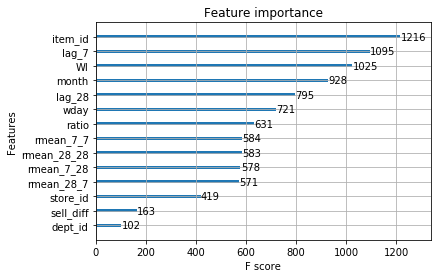

<Figure size 432x288 with 0 Axes>

In [109]:
xgb.plot_importance(xgb_r)
plt.figure(figsize = (6, 4))
plt.show()

In [110]:
predictions = xgb_r.predict(X_test)

In [111]:
from sklearn.metrics import explained_variance_score
print(explained_variance_score(y_test,predictions))

0.5986723453285541


In [112]:
import lightgbm as lgb
np.random.seed(777)

# Define categorical features
catFeats = ['item_id', 'lag_7', 'WI', 'month', 'lag_28', 'wday', 'ratio',  'rmean_7_7', 
            'rmean_28_28', 'rmean_7_28', 'rmean_28_7',
            'store_id', 'sell_diff', 'dept_id']

validInds = np.random.choice(WI_X_train.index.values, 1_500_000, replace = False)
trainInds = np.setdiff1d(WI_X_train.index.values, validInds)

trainData = lgb.Dataset(WI_X_train.loc[trainInds], label = WI_y_train.loc[trainInds], 
                        categorical_feature = catFeats,free_raw_data = False)
validData = lgb.Dataset(WI_X_train.loc[validInds], label = WI_y_train.loc[validInds],
                        categorical_feature = catFeats,free_raw_data = False)

In [113]:
import gc
gc.collect()

184

In [114]:
params = {
          "objective" : "poisson",
          "metric" :"rmse",
          "force_row_wise" : True,
          "learning_rate" : 0.075,
          "sub_row" : 0.75,
          "bagging_freq" : 1,
          "lambda_l2" : 0.1,
          "metric": ["rmse"],
          'verbosity': 1,
          'num_iterations' : 1200,
          'num_leaves': 128,
          "min_data_in_leaf": 100,
         }

In [115]:
m_lgb = lgb.train(params, trainData, valid_sets = validData, verbose_eval = 100) 

C:\Users\Xiang Fu\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Xiang Fu\anaconda3\lib\site-packages\lightgbm\basic.py:1243: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[100]	valid_0's rmse: 2.14952
[200]	valid_0's rmse: 2.12884
[300]	valid_0's rmse: 2.12156
[400]	valid_0's rmse: 2.11804
[500]	valid_0's rmse: 2.11519
[600]	valid_0's rmse: 2.11256
[700]	valid_0's rmse: 2.11173
[800]	valid_0's rmse: 2.11098
[900]	valid_0's rmse: 2.11109
[1000]	valid_0's rmse: 2.1115
[1100]	valid_0's rmse: 2.11138
[1200]	valid_0's rmse: 2.11196


In [116]:
# Save the model
m_lgb.save_model("model_WI.lgb")

In [117]:
# Last day used for training
trLast = 1913
# Maximum lag day
maxLags = 57

def create_features(ds):          
    dayLags = [7, 28]
    lagSalesCols = [f"lag_{dayLag}" for dayLag in dayLags]
    for dayLag, lagSalesCol in zip(dayLags, lagSalesCols):
        ds[lagSalesCol] = ds[["id","sales"]].groupby("id")["sales"].shift(dayLag)

    windows = [7, 28]
    for window in windows:
        for dayLag, lagSalesCol in zip(dayLags, lagSalesCols):
            ds[f"rmean_{dayLag}_{window}"] = ds[["id", lagSalesCol]].groupby("id")[lagSalesCol].transform(lambda x: x.rolling(window).mean())
    ds_item_encoder = preprocessing.LabelEncoder()
    ds_item_fit = ds_item_encoder.fit(ds['item_id'].unique())
    ds.iloc[:,1] = ds_item_fit.transform(ds.iloc[:,1])

    ds_dept_encoder = preprocessing.LabelEncoder()
    ds_dept_fit = ds_dept_encoder.fit(ds['dept_id'].unique())
    ds.iloc[:,2] = ds_dept_fit.transform(ds.iloc[:,2])

    ds_store_encoder = preprocessing.LabelEncoder()
    ds_store_fit = ds_store_encoder.fit(ds['store_id'].unique())
    ds.iloc[:,3] = ds_store_fit.transform(ds.iloc[:,3])

    ds_cat_encoder = preprocessing.LabelEncoder()
    ds_cat_fit = ds_cat_encoder.fit(ds['cat_id'].unique())
    ds.iloc[:,4] = ds_cat_fit.transform(ds.iloc[:,4])    

In [118]:
fday = datetime(2016,4, 25) 
alphas = [1.028, 1.023, 1.018]
weights = [1/len(alphas)] * len(alphas)
sub = 0.

for icount, (alpha, weight) in enumerate(zip(alphas, weights)):

    te = WI_validation.copy()
    cols = [f"F{i}" for i in range(1,57)]

    for tdelta in range(0, 56):
        day = fday + timedelta(days=tdelta)
        print(tdelta, day)
        tst = te[(te['date'] >= day - timedelta(days=maxLags)) & (te['date'] <= day)].copy()
        create_features(tst)
        tst = tst.loc[tst['date'] == day , trainCols]
        te.loc[te['date'] == day, "sales"] = alpha * m_lgb.predict(tst) # magic multiplier by kyakovlev

    te_sub = te.loc[te['date'] >= fday, ["id", "sales"]].copy()
    te_sub["F"] = [f"F{rank}" for rank in te_sub.groupby("id")["id"].cumcount()+1]
    te_sub = te_sub.set_index(["id", "F" ]).unstack()["sales"][cols].reset_index()
    te_sub.fillna(0., inplace = True)
    te_sub.sort_values("id", inplace = True)
    te_sub.reset_index(drop=True, inplace = True)
    te_sub.to_csv(f"submission_{icount}.csv",index=False)
    if icount == 0 :
        sub = te_sub
        sub[cols] *= weight
    else:
        sub[cols] += te_sub[cols]*weight
    print(icount, alpha, weight)


0 2016-04-25 00:00:00
1 2016-04-26 00:00:00
2 2016-04-27 00:00:00
3 2016-04-28 00:00:00
4 2016-04-29 00:00:00
5 2016-04-30 00:00:00
6 2016-05-01 00:00:00
7 2016-05-02 00:00:00
8 2016-05-03 00:00:00
9 2016-05-04 00:00:00
10 2016-05-05 00:00:00
11 2016-05-06 00:00:00
12 2016-05-07 00:00:00
13 2016-05-08 00:00:00
14 2016-05-09 00:00:00
15 2016-05-10 00:00:00
16 2016-05-11 00:00:00
17 2016-05-12 00:00:00
18 2016-05-13 00:00:00
19 2016-05-14 00:00:00
20 2016-05-15 00:00:00
21 2016-05-16 00:00:00
22 2016-05-17 00:00:00
23 2016-05-18 00:00:00
24 2016-05-19 00:00:00
25 2016-05-20 00:00:00
26 2016-05-21 00:00:00
27 2016-05-22 00:00:00
28 2016-05-23 00:00:00
29 2016-05-24 00:00:00
30 2016-05-25 00:00:00
31 2016-05-26 00:00:00
32 2016-05-27 00:00:00
33 2016-05-28 00:00:00
34 2016-05-29 00:00:00
35 2016-05-30 00:00:00
36 2016-05-31 00:00:00
37 2016-06-01 00:00:00
38 2016-06-02 00:00:00
39 2016-06-03 00:00:00
40 2016-06-04 00:00:00
41 2016-06-05 00:00:00
42 2016-06-06 00:00:00
43 2016-06-07 00:00:0

In [119]:
sub2 = sub.copy()
sub2["id"] = sub2["id"].str.replace("validation$", "evaluation")
sub = pd.concat([sub, sub2], axis=0, sort=False)
sub.head(10)

F,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F47,F48,F49,F50,F51,F52,F53,F54,F55,F56
0,FOODS_1_001_WI_1_validation,0.452249,0.501587,0.358370,0.349629,0.414583,0.863702,0.506278,0.459160,0.423776,...,0.365431,0.449841,0.424177,0.321904,0.300626,0.334744,0.332151,0.365431,0.444182,0.347258
1,FOODS_1_001_WI_2_validation,0.326498,0.406693,0.422872,0.329966,0.345717,0.385569,0.352089,0.359198,0.355518,...,0.278490,0.370909,0.361880,0.285498,0.336046,0.350879,0.292158,0.278490,0.277792,0.240746
2,FOODS_1_001_WI_3_validation,0.185960,0.187684,0.254213,0.255183,0.195290,0.403847,0.186681,0.182740,0.185372,...,0.154825,0.230931,0.233158,0.159925,0.175837,0.165453,0.155720,0.154825,0.190241,0.166145
3,FOODS_1_002_WI_1_validation,0.628119,0.699660,0.631271,0.664555,0.815034,0.935368,0.780876,0.930582,0.893519,...,0.769766,0.795244,0.753402,0.609153,0.621902,0.618882,0.598585,0.911439,0.862572,0.660651
4,FOODS_1_002_WI_2_validation,0.344932,0.425337,0.343071,0.434887,0.626819,0.243057,0.255991,0.534620,0.637298,...,0.416890,0.531893,0.510050,0.447530,0.552274,0.560610,0.446156,0.416890,0.304860,0.271805
5,FOODS_1_002_WI_3_validation,0.295352,0.217046,0.231990,0.232648,0.224776,0.207300,0.211106,0.310797,0.420750,...,0.235980,0.341494,0.320737,0.238260,0.303938,0.314007,0.255686,0.235980,0.235872,0.208957
6,FOODS_1_003_WI_1_validation,0.819309,0.791218,0.847360,0.660862,1.008290,0.940906,0.999851,0.943201,1.047819,...,1.117793,1.256347,1.050842,0.946586,0.959926,0.948606,0.922051,1.207637,1.008135,0.974480
7,FOODS_1_003_WI_2_validation,0.180122,0.222718,0.180279,0.181880,0.208408,0.161742,0.179723,0.240855,0.212367,...,0.202982,0.203747,0.205149,0.187615,0.210073,0.206631,0.193315,0.202982,0.184857,0.194218
8,FOODS_1_003_WI_3_validation,0.207166,0.222589,0.202398,0.204249,0.229624,0.215416,0.204105,0.261490,0.276186,...,0.199529,0.217849,0.223475,0.192111,0.250705,0.229665,0.193310,0.199529,0.170533,0.183408
9,FOODS_1_004_WI_1_validation,0.119474,0.117727,0.117745,0.122241,0.148014,0.154299,0.266019,0.214217,0.233574,...,0.266949,0.246327,0.234489,0.206665,0.202564,0.201338,0.206369,0.266949,0.265133,0.247902


In [120]:
sub.tail(10)

F,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F47,F48,F49,F50,F51,F52,F53,F54,F55,F56
9137,HOUSEHOLD_2_513_WI_3_evaluation,0.447608,0.311610,0.346270,0.350547,0.436147,0.411605,0.375820,0.488749,0.337376,...,0.371378,0.388039,0.370916,0.334145,0.299468,0.339333,0.313651,0.371378,0.407234,0.346705
9138,HOUSEHOLD_2_514_WI_1_evaluation,0.102688,0.119090,0.113853,0.115897,0.103205,0.103913,0.071682,0.068174,0.083179,...,0.111610,0.105606,0.099957,0.107953,0.111215,0.105923,0.112927,0.111610,0.102230,0.103960
9139,HOUSEHOLD_2_514_WI_2_evaluation,0.046003,0.055406,0.052650,0.055506,0.043650,0.048601,0.032926,0.034945,0.043613,...,0.040417,0.043647,0.041949,0.040729,0.050008,0.046694,0.044676,0.040417,0.042663,0.040908
9140,HOUSEHOLD_2_514_WI_3_evaluation,0.088705,0.106311,0.089113,0.091594,0.088168,0.074406,0.049605,0.067128,0.073864,...,0.067364,0.076225,0.076807,0.072709,0.092548,0.076496,0.068380,0.067364,0.068853,0.067873
9141,HOUSEHOLD_2_515_WI_1_evaluation,0.101542,0.089651,0.100869,0.100964,0.155991,0.175696,0.125700,0.077625,0.070403,...,0.112732,0.138880,0.119437,0.094676,0.073917,0.086297,0.098620,0.112732,0.143531,0.118338
9142,HOUSEHOLD_2_515_WI_2_evaluation,0.084263,0.069037,0.071398,0.077998,0.106558,0.131723,0.081250,0.073184,0.059980,...,0.087214,0.106010,0.090605,0.075269,0.061259,0.072360,0.070195,0.087214,0.109953,0.091411
9143,HOUSEHOLD_2_515_WI_3_evaluation,0.135801,0.115412,0.126678,0.119805,0.158250,0.164694,0.115222,0.113828,0.122850,...,0.132324,0.159996,0.143278,0.122571,0.098891,0.109314,0.116438,0.132324,0.165366,0.135758
9144,HOUSEHOLD_2_516_WI_1_evaluation,0.056962,0.055851,0.057912,0.060509,0.083532,0.095326,0.078073,0.053431,0.051252,...,0.074564,0.099603,0.082747,0.051863,0.047970,0.050567,0.054929,0.074564,0.101763,0.072313
9145,HOUSEHOLD_2_516_WI_2_evaluation,0.054738,0.055830,0.055415,0.052576,0.073112,0.080579,0.063913,0.051875,0.051576,...,0.063414,0.077912,0.068611,0.048970,0.048245,0.049026,0.051569,0.063414,0.069152,0.059697
9146,HOUSEHOLD_2_516_WI_3_evaluation,0.086658,0.082741,0.075717,0.079190,0.109303,0.125667,0.126901,0.091052,0.084614,...,0.104680,0.130638,0.120293,0.085400,0.079175,0.072868,0.077929,0.104680,0.135404,0.117200


In [121]:
sub.id.nunique(), sub["id"].str.contains("validation$").sum()

(18294, 9147)

In [122]:
sub.shape

(18294, 57)

In [123]:
sub22 = pd.read_csv(r'C:\Users\Xiang Fu\Desktop\Kaggle\m5-forecasting-accuracy/sample_submission.csv')

In [124]:
sub22.shape
# 60980/2 = 30490

(60980, 29)

In [125]:
sub_wi_va = sub22.iloc[21343:30490,:]
sub_wi_va

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
21343,HOBBIES_1_001_WI_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21344,HOBBIES_1_002_WI_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21345,HOBBIES_1_003_WI_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21346,HOBBIES_1_004_WI_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21347,HOBBIES_1_005_WI_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30486,FOODS_3_824_WI_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30487,FOODS_3_825_WI_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30488,FOODS_3_826_WI_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
sub_wi_va = sub_wi_va.merge(sub, on = ["id"], copy = False)

In [127]:
sub_wi_va.drop(sub_wi_va.columns[1:29], axis = 1, inplace = True)

In [128]:
sub_wi_va

,id,F1_y,F2_y,F3_y,F4_y,F5_y,F6_y,F7_y,F8_y,F9_y,...,F47,F48,F49,F50,F51,F52,F53,F54,F55,F56
0,HOBBIES_1_001_WI_1_validation,0.172347,0.197215,0.222185,0.216651,0.309491,0.303742,0.291026,0.155936,0.146183,...,0.212814,0.247988,0.239759,0.159807,0.149369,0.155368,0.149700,0.212814,0.227502,0.192395
1,HOBBIES_1_002_WI_1_validation,0.567098,0.647283,0.532972,0.549936,0.673592,0.477615,0.719882,0.601116,0.628268,...,0.787613,0.850640,0.810413,0.638901,0.531230,0.558925,0.623788,0.787613,0.892310,0.726444
2,HOBBIES_1_003_WI_1_validation,0.283921,0.212492,0.159092,0.236195,0.323678,0.269081,0.345863,0.137450,0.123091,...,0.205296,0.304683,0.279253,0.155394,0.133478,0.135797,0.154903,0.205296,0.280893,0.204179
3,HOBBIES_1_004_WI_1_validation,0.352536,0.354356,0.453604,0.442501,0.473645,0.461584,0.358726,0.336042,0.323718,...,0.366328,0.390738,0.376280,0.317284,0.323491,0.346740,0.322551,0.366328,0.403490,0.352390
4,HOBBIES_1_005_WI_1_validation,0.672355,0.708299,0.578231,0.646100,0.908448,1.104699,0.901266,0.838584,0.775295,...,0.876885,1.166971,0.850707,0.743452,0.520796,0.668564,0.736990,0.876885,1.090734,0.989651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9142,FOODS_3_823_WI_3_validation,0.137741,0.131926,0.136497,0.270366,0.149920,0.156388,0.275258,0.160006,0.157714,...,0.147257,0.205308,0.213604,0.141879,0.174787,0.173716,0.139764,0.147257,0.166201,0.142271
9143,FOODS_3_824_WI_3_validation,0.102415,0.108153,0.122191,0.118339,0.096436,0.319921,0.177584,0.263897,0.100120,...,0.056928,0.092876,0.105528,0.058619,0.103637,0.117207,0.068811,0.056928,0.072647,0.058481
9144,FOODS_3_825_WI_3_validation,0.859524,0.698996,0.769696,0.697763,0.485156,0.859136,0.457864,0.602554,0.590911,...,0.286796,0.729747,0.749684,0.295295,0.442497,0.478863,0.281671,0.286796,0.362906,0.293754
9145,FOODS_3_826_WI_3_validation,1.286390,1.071534,0.946481,0.673287,1.427389,0.996936,0.706763,1.046491,1.125667,...,1.093715,1.625034,1.679826,1.029229,1.433230,1.402103,1.099988,1.076808,1.309088,1.143667


In [129]:
sub_wi_va.shape

(9147, 57)

In [130]:
sub_wi_va.drop(sub_wi_va.columns[29:], axis = 1, inplace = True)

In [131]:
sub_wi_va

,id,F1_y,F2_y,F3_y,F4_y,F5_y,F6_y,F7_y,F8_y,F9_y,...,F19_y,F20_y,F21_y,F22_y,F23_y,F24_y,F25_y,F26_y,F27_y,F28_y
0,HOBBIES_1_001_WI_1_validation,0.172347,0.197215,0.222185,0.216651,0.309491,0.303742,0.291026,0.155936,0.146183,...,0.228194,0.267534,0.257079,0.160182,0.148487,0.148331,0.183167,0.324492,0.299805,0.288322
1,HOBBIES_1_002_WI_1_validation,0.567098,0.647283,0.532972,0.549936,0.673592,0.477615,0.719882,0.601116,0.628268,...,0.689522,0.816789,0.780615,0.704708,0.674871,0.521675,0.613542,0.903491,0.968553,0.805724
2,HOBBIES_1_003_WI_1_validation,0.283921,0.212492,0.159092,0.236195,0.323678,0.269081,0.345863,0.137450,0.123091,...,0.224717,0.283721,0.407767,0.205825,0.180328,0.139589,0.204883,0.315664,0.267461,0.338474
3,HOBBIES_1_004_WI_1_validation,0.352536,0.354356,0.453604,0.442501,0.473645,0.461584,0.358726,0.336042,0.323718,...,0.389212,0.562062,0.394617,0.324363,0.413851,0.335299,0.325097,0.521641,0.604981,0.419509
4,HOBBIES_1_005_WI_1_validation,0.672355,0.708299,0.578231,0.646100,0.908448,1.104699,0.901266,0.838584,0.775295,...,0.857960,1.198760,0.861171,0.585012,0.666449,0.568245,0.704020,0.847512,1.096073,0.838326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9142,FOODS_3_823_WI_3_validation,0.137741,0.131926,0.136497,0.270366,0.149920,0.156388,0.275258,0.160006,0.157714,...,0.200253,0.196821,0.202202,0.131385,0.128618,0.130800,0.185696,0.143336,0.159467,0.245500
9143,FOODS_3_824_WI_3_validation,0.102415,0.108153,0.122191,0.118339,0.096436,0.319921,0.177584,0.263897,0.100120,...,0.056817,0.095811,0.107167,0.058754,0.063395,0.069281,0.067208,0.056817,0.237433,0.077327
9144,FOODS_3_825_WI_3_validation,0.859524,0.698996,0.769696,0.697763,0.485156,0.859136,0.457864,0.602554,0.590911,...,0.601521,1.020354,1.087588,0.458169,0.311768,0.425300,0.308503,0.336621,0.816282,0.780511
9145,FOODS_3_826_WI_3_validation,1.286390,1.071534,0.946481,0.673287,1.427389,0.996936,0.706763,1.046491,1.125667,...,1.096281,1.608424,1.518734,1.036878,1.045748,0.840900,0.932754,1.130955,0.971518,1.193864


In [132]:
sub_wi_va.rename(columns = dict(zip(sub_wi_va.columns[1:], sub22.columns[1:])), inplace = True)

In [133]:
sub_wi_va

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_WI_1_validation,0.172347,0.197215,0.222185,0.216651,0.309491,0.303742,0.291026,0.155936,0.146183,...,0.228194,0.267534,0.257079,0.160182,0.148487,0.148331,0.183167,0.324492,0.299805,0.288322
1,HOBBIES_1_002_WI_1_validation,0.567098,0.647283,0.532972,0.549936,0.673592,0.477615,0.719882,0.601116,0.628268,...,0.689522,0.816789,0.780615,0.704708,0.674871,0.521675,0.613542,0.903491,0.968553,0.805724
2,HOBBIES_1_003_WI_1_validation,0.283921,0.212492,0.159092,0.236195,0.323678,0.269081,0.345863,0.137450,0.123091,...,0.224717,0.283721,0.407767,0.205825,0.180328,0.139589,0.204883,0.315664,0.267461,0.338474
3,HOBBIES_1_004_WI_1_validation,0.352536,0.354356,0.453604,0.442501,0.473645,0.461584,0.358726,0.336042,0.323718,...,0.389212,0.562062,0.394617,0.324363,0.413851,0.335299,0.325097,0.521641,0.604981,0.419509
4,HOBBIES_1_005_WI_1_validation,0.672355,0.708299,0.578231,0.646100,0.908448,1.104699,0.901266,0.838584,0.775295,...,0.857960,1.198760,0.861171,0.585012,0.666449,0.568245,0.704020,0.847512,1.096073,0.838326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9142,FOODS_3_823_WI_3_validation,0.137741,0.131926,0.136497,0.270366,0.149920,0.156388,0.275258,0.160006,0.157714,...,0.200253,0.196821,0.202202,0.131385,0.128618,0.130800,0.185696,0.143336,0.159467,0.245500
9143,FOODS_3_824_WI_3_validation,0.102415,0.108153,0.122191,0.118339,0.096436,0.319921,0.177584,0.263897,0.100120,...,0.056817,0.095811,0.107167,0.058754,0.063395,0.069281,0.067208,0.056817,0.237433,0.077327
9144,FOODS_3_825_WI_3_validation,0.859524,0.698996,0.769696,0.697763,0.485156,0.859136,0.457864,0.602554,0.590911,...,0.601521,1.020354,1.087588,0.458169,0.311768,0.425300,0.308503,0.336621,0.816282,0.780511
9145,FOODS_3_826_WI_3_validation,1.286390,1.071534,0.946481,0.673287,1.427389,0.996936,0.706763,1.046491,1.125667,...,1.096281,1.608424,1.518734,1.036878,1.045748,0.840900,0.932754,1.130955,0.971518,1.193864


In [134]:
sub_wi_va.to_csv("submission_wi_va.csv",index=False)

In [135]:
sub_wi_ev = sub22.iloc[51833:60980,:]
sub_wi_ev

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
51833,HOBBIES_1_001_WI_1_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51834,HOBBIES_1_002_WI_1_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51835,HOBBIES_1_003_WI_1_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51836,HOBBIES_1_004_WI_1_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51837,HOBBIES_1_005_WI_1_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60975,FOODS_3_823_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60976,FOODS_3_824_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60977,FOODS_3_825_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60978,FOODS_3_826_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
sub_wi_ev.shape

(9147, 29)

In [137]:
sub_wi_ev = sub_wi_ev.merge(sub, on = ["id"], copy = False)
sub_wi_ev

,id,F1_x,F2_x,F3_x,F4_x,F5_x,F6_x,F7_x,F8_x,F9_x,...,F47,F48,F49,F50,F51,F52,F53,F54,F55,F56
0,HOBBIES_1_001_WI_1_evaluation,0,0,0,0,0,0,0,0,0,...,0.212814,0.247988,0.239759,0.159807,0.149369,0.155368,0.149700,0.212814,0.227502,0.192395
1,HOBBIES_1_002_WI_1_evaluation,0,0,0,0,0,0,0,0,0,...,0.787613,0.850640,0.810413,0.638901,0.531230,0.558925,0.623788,0.787613,0.892310,0.726444
2,HOBBIES_1_003_WI_1_evaluation,0,0,0,0,0,0,0,0,0,...,0.205296,0.304683,0.279253,0.155394,0.133478,0.135797,0.154903,0.205296,0.280893,0.204179
3,HOBBIES_1_004_WI_1_evaluation,0,0,0,0,0,0,0,0,0,...,0.366328,0.390738,0.376280,0.317284,0.323491,0.346740,0.322551,0.366328,0.403490,0.352390
4,HOBBIES_1_005_WI_1_evaluation,0,0,0,0,0,0,0,0,0,...,0.876885,1.166971,0.850707,0.743452,0.520796,0.668564,0.736990,0.876885,1.090734,0.989651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9142,FOODS_3_823_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0.147257,0.205308,0.213604,0.141879,0.174787,0.173716,0.139764,0.147257,0.166201,0.142271
9143,FOODS_3_824_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0.056928,0.092876,0.105528,0.058619,0.103637,0.117207,0.068811,0.056928,0.072647,0.058481
9144,FOODS_3_825_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0.286796,0.729747,0.749684,0.295295,0.442497,0.478863,0.281671,0.286796,0.362906,0.293754
9145,FOODS_3_826_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,1.093715,1.625034,1.679826,1.029229,1.433230,1.402103,1.099988,1.076808,1.309088,1.143667


In [138]:
sub_wi_ev.drop(sub_wi_ev.columns[1:29], axis = 1, inplace = True)
sub_wi_ev

,id,F1_y,F2_y,F3_y,F4_y,F5_y,F6_y,F7_y,F8_y,F9_y,...,F47,F48,F49,F50,F51,F52,F53,F54,F55,F56
0,HOBBIES_1_001_WI_1_evaluation,0.172347,0.197215,0.222185,0.216651,0.309491,0.303742,0.291026,0.155936,0.146183,...,0.212814,0.247988,0.239759,0.159807,0.149369,0.155368,0.149700,0.212814,0.227502,0.192395
1,HOBBIES_1_002_WI_1_evaluation,0.567098,0.647283,0.532972,0.549936,0.673592,0.477615,0.719882,0.601116,0.628268,...,0.787613,0.850640,0.810413,0.638901,0.531230,0.558925,0.623788,0.787613,0.892310,0.726444
2,HOBBIES_1_003_WI_1_evaluation,0.283921,0.212492,0.159092,0.236195,0.323678,0.269081,0.345863,0.137450,0.123091,...,0.205296,0.304683,0.279253,0.155394,0.133478,0.135797,0.154903,0.205296,0.280893,0.204179
3,HOBBIES_1_004_WI_1_evaluation,0.352536,0.354356,0.453604,0.442501,0.473645,0.461584,0.358726,0.336042,0.323718,...,0.366328,0.390738,0.376280,0.317284,0.323491,0.346740,0.322551,0.366328,0.403490,0.352390
4,HOBBIES_1_005_WI_1_evaluation,0.672355,0.708299,0.578231,0.646100,0.908448,1.104699,0.901266,0.838584,0.775295,...,0.876885,1.166971,0.850707,0.743452,0.520796,0.668564,0.736990,0.876885,1.090734,0.989651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9142,FOODS_3_823_WI_3_evaluation,0.137741,0.131926,0.136497,0.270366,0.149920,0.156388,0.275258,0.160006,0.157714,...,0.147257,0.205308,0.213604,0.141879,0.174787,0.173716,0.139764,0.147257,0.166201,0.142271
9143,FOODS_3_824_WI_3_evaluation,0.102415,0.108153,0.122191,0.118339,0.096436,0.319921,0.177584,0.263897,0.100120,...,0.056928,0.092876,0.105528,0.058619,0.103637,0.117207,0.068811,0.056928,0.072647,0.058481
9144,FOODS_3_825_WI_3_evaluation,0.859524,0.698996,0.769696,0.697763,0.485156,0.859136,0.457864,0.602554,0.590911,...,0.286796,0.729747,0.749684,0.295295,0.442497,0.478863,0.281671,0.286796,0.362906,0.293754
9145,FOODS_3_826_WI_3_evaluation,1.286390,1.071534,0.946481,0.673287,1.427389,0.996936,0.706763,1.046491,1.125667,...,1.093715,1.625034,1.679826,1.029229,1.433230,1.402103,1.099988,1.076808,1.309088,1.143667


In [139]:
sub_wi_ev.drop(sub_wi_ev.columns[1:29], axis = 1, inplace = True)
sub_wi_ev

,id,F29,F30,F31,F32,F33,F34,F35,F36,F37,...,F47,F48,F49,F50,F51,F52,F53,F54,F55,F56
0,HOBBIES_1_001_WI_1_evaluation,0.160182,0.148487,0.148331,0.151075,0.228194,0.239510,0.229352,0.157729,0.148487,...,0.212814,0.247988,0.239759,0.159807,0.149369,0.155368,0.149700,0.212814,0.227502,0.192395
1,HOBBIES_1_002_WI_1_evaluation,0.704708,0.761663,0.688146,0.680287,0.936611,0.968553,0.941447,0.669457,0.674871,...,0.787613,0.850640,0.810413,0.638901,0.531230,0.558925,0.623788,0.787613,0.892310,0.726444
2,HOBBIES_1_003_WI_1_evaluation,0.154582,0.136704,0.139589,0.151289,0.224717,0.267461,0.235576,0.162904,0.136704,...,0.205296,0.304683,0.279253,0.155394,0.133478,0.135797,0.154903,0.205296,0.280893,0.204179
3,HOBBIES_1_004_WI_1_evaluation,0.324363,0.322571,0.335299,0.325097,0.389212,0.443924,0.419509,0.325472,0.322571,...,0.366328,0.390738,0.376280,0.317284,0.323491,0.346740,0.322551,0.366328,0.403490,0.352390
4,HOBBIES_1_005_WI_1_evaluation,0.771138,0.720489,0.698925,0.700918,0.857960,1.076420,0.743500,0.937025,0.666449,...,0.876885,1.166971,0.850707,0.743452,0.520796,0.668564,0.736990,0.876885,1.090734,0.989651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9142,FOODS_3_823_WI_3_evaluation,0.131385,0.128618,0.130800,0.127710,0.143336,0.159467,0.161179,0.131685,0.128618,...,0.147257,0.205308,0.213604,0.141879,0.174787,0.173716,0.139764,0.147257,0.166201,0.142271
9143,FOODS_3_824_WI_3_evaluation,0.058754,0.063395,0.069281,0.067208,0.056817,0.073744,0.077327,0.059238,0.063395,...,0.056928,0.092876,0.105528,0.058619,0.103637,0.117207,0.068811,0.056928,0.072647,0.058481
9144,FOODS_3_825_WI_3_evaluation,0.330618,0.311768,0.308693,0.308503,0.336621,0.467078,0.472073,0.330750,0.311768,...,0.286796,0.729747,0.749684,0.295295,0.442497,0.478863,0.281671,0.286796,0.362906,0.293754
9145,FOODS_3_826_WI_3_evaluation,0.795876,0.832927,0.892557,0.862508,1.091297,1.336727,1.359075,0.736158,0.706359,...,1.093715,1.625034,1.679826,1.029229,1.433230,1.402103,1.099988,1.076808,1.309088,1.143667


In [140]:
sub_wi_ev.rename(columns = dict(zip(sub_wi_ev.columns[1:], sub22.columns[1:])), inplace = True)
sub_wi_ev

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_WI_1_evaluation,0.160182,0.148487,0.148331,0.151075,0.228194,0.239510,0.229352,0.157729,0.148487,...,0.212814,0.247988,0.239759,0.159807,0.149369,0.155368,0.149700,0.212814,0.227502,0.192395
1,HOBBIES_1_002_WI_1_evaluation,0.704708,0.761663,0.688146,0.680287,0.936611,0.968553,0.941447,0.669457,0.674871,...,0.787613,0.850640,0.810413,0.638901,0.531230,0.558925,0.623788,0.787613,0.892310,0.726444
2,HOBBIES_1_003_WI_1_evaluation,0.154582,0.136704,0.139589,0.151289,0.224717,0.267461,0.235576,0.162904,0.136704,...,0.205296,0.304683,0.279253,0.155394,0.133478,0.135797,0.154903,0.205296,0.280893,0.204179
3,HOBBIES_1_004_WI_1_evaluation,0.324363,0.322571,0.335299,0.325097,0.389212,0.443924,0.419509,0.325472,0.322571,...,0.366328,0.390738,0.376280,0.317284,0.323491,0.346740,0.322551,0.366328,0.403490,0.352390
4,HOBBIES_1_005_WI_1_evaluation,0.771138,0.720489,0.698925,0.700918,0.857960,1.076420,0.743500,0.937025,0.666449,...,0.876885,1.166971,0.850707,0.743452,0.520796,0.668564,0.736990,0.876885,1.090734,0.989651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9142,FOODS_3_823_WI_3_evaluation,0.131385,0.128618,0.130800,0.127710,0.143336,0.159467,0.161179,0.131685,0.128618,...,0.147257,0.205308,0.213604,0.141879,0.174787,0.173716,0.139764,0.147257,0.166201,0.142271
9143,FOODS_3_824_WI_3_evaluation,0.058754,0.063395,0.069281,0.067208,0.056817,0.073744,0.077327,0.059238,0.063395,...,0.056928,0.092876,0.105528,0.058619,0.103637,0.117207,0.068811,0.056928,0.072647,0.058481
9144,FOODS_3_825_WI_3_evaluation,0.330618,0.311768,0.308693,0.308503,0.336621,0.467078,0.472073,0.330750,0.311768,...,0.286796,0.729747,0.749684,0.295295,0.442497,0.478863,0.281671,0.286796,0.362906,0.293754
9145,FOODS_3_826_WI_3_evaluation,0.795876,0.832927,0.892557,0.862508,1.091297,1.336727,1.359075,0.736158,0.706359,...,1.093715,1.625034,1.679826,1.029229,1.433230,1.402103,1.099988,1.076808,1.309088,1.143667


In [141]:
sub_wi_ev.to_csv("submission_wi_ev.csv",index=False)